# Drift plots. 
### Hoeffding Trees with nmin adaptation - Garcia-Martin et al.

- No drift, medium, high
- Acc and energy



In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import ticker

results = pd.read_csv('results/results_drift.csv')
results.head(10)

,Dataset,Accuracy (%),Accuracy (%).1,Accuracy (%).2,Total Energy(J),Total Energy(J).1,Total Energy(J).2,Proc Energy (J),Proc Energy (J).1,Proc Energy (J).2,DRAM Energy(J),DRAM Energy(J).1,DRAM Energy(J).2
0,NaN,avfdt,cvfdt,vfdt,avfdt,cvfdt,vfdt,avfdt,cvfdt,vfdt,avfdt,cvfdt,vfdt
1,LED,72.772,70.522,70.993,240.2,1348.483,235.016,229.383,1287.597,224.43,10.816,60.886,10.585
2,LED_3,72.772,70.522,70.993,242.192,1303.675,239.456,232.25,1247.241,228.972,9.942,56.433,10.484
3,LED_7,72.772,70.522,70.993,241.754,1304.802,240.969,231.315,1246.601,230.487,10.439,58.201,10.481
4,RBF,89.011,87.852,89.896,529.949,8622.954,600.305,506.492,7978.811,572.382,23.457,644.143,27.923
5,RBF_m,50.67,50.038,50.963,521.685,5915.538,651.813,499.716,5570.954,624.662,21.969,344.584,27.152
6,RBF_f,53.046,51.596,52.764,512.692,12201.716,640.453,488.523,11371.222,612.006,24.168,830.494,28.448
7,waveform,78.044,76.787,79.136,929.005,7248.511,1237.291,891.452,6835.172,1186.865,37.553,413.34,50.426
8,waveform_10,78.278,76.787,79.124,946.789,7141.902,1211.883,909.367,6724.86,1161.481,37.421,417.042,50.403
9,waveform_5,78.278,76.787,79.124,949.202,7198.386,1216.65,912.005,6782.246,1164.041,37.198,416.14,52.609


In [9]:
# LED
LED_vfdt_eng = results.iloc[1:4,6].astype(float)
LED_vfdt_nmin_eng = results.iloc[1:4,4].astype(float)
LED_cvfdt_eng = results.iloc[1:4,5].astype(float)

LED_vfdt_acc = results.iloc[1:4,3].astype(float)
LED_vfdt_nmin_acc = results.iloc[1:4,1].astype(float)
LED_cvfdt_acc = results.iloc[1:4,2].astype(float)

# RBF 
RBF_vfdt_eng = results.iloc[4:7,6].astype(float)
RBF_vfdt_nmin_eng = results.iloc[4:7,4].astype(float)
RBF_cvfdt_eng = results.iloc[4:7,5].astype(float)

RBF_vfdt_acc = results.iloc[4:7,3].astype(float)
RBF_vfdt_nmin_acc = results.iloc[4:7,1].astype(float)
RBF_cvfdt_acc = results.iloc[4:7,2].astype(float)

# waveform
waveform_vfdt_eng = results.iloc[7:10,6].astype(float)
waveform_vfdt_nmin_eng = results.iloc[7:10,4].astype(float)
waveform_cvfdt_eng = results.iloc[7:10,5].astype(float)

waveform_vfdt_acc = results.iloc[7:10,3].astype(float)
waveform_vfdt_nmin_acc = results.iloc[7:10,1].astype(float)
waveform_cvfdt_acc = results.iloc[7:10,2].astype(float)

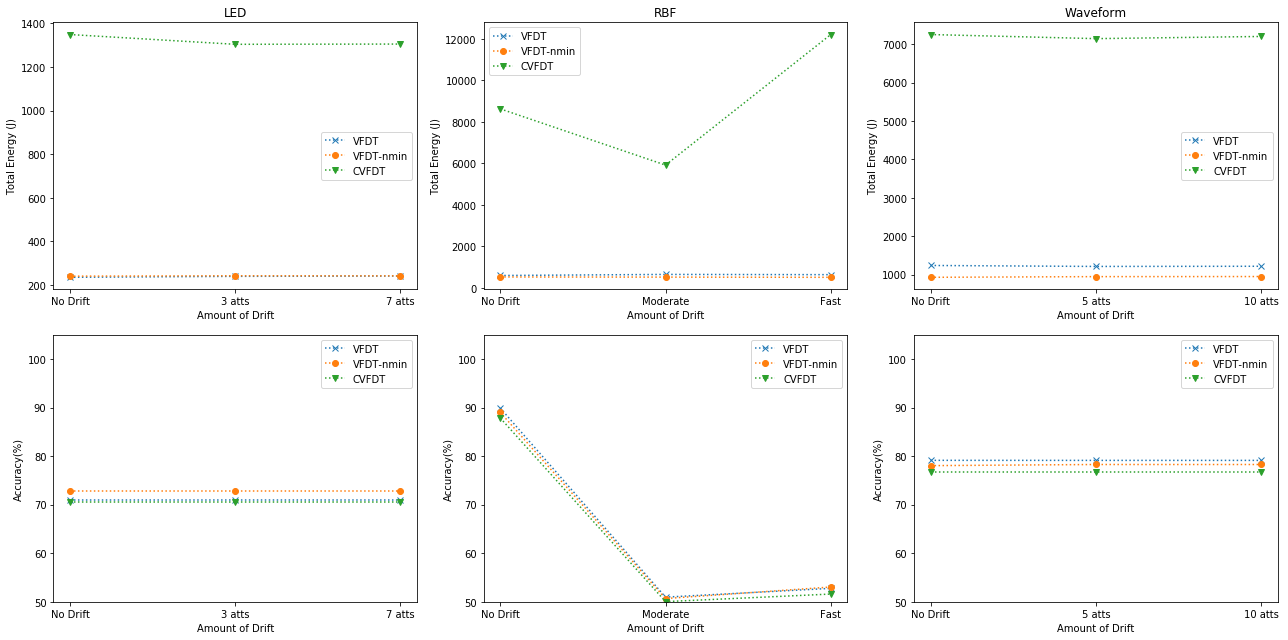

In [12]:
# With CVFDT
x_axis = [1,2,3]
fig, ((ax1, ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2, 3,  figsize=(18,9))
# fig.suptitle('Accuracy and energy consumption of drift scenarios', y=1.03)

# LED
ticks_LED = ['No Drift', '3 atts',  '7 atts']
ax1.plot(ticks_LED, LED_vfdt_eng, label='VFDT', marker='x', linestyle=":")
ax1.plot(ticks_LED, LED_vfdt_nmin_eng, label='VFDT-nmin', marker='o', linestyle=":")
ax1.plot(ticks_LED, LED_cvfdt_eng, label='CVFDT', marker='v', linestyle=":")
ax1.legend(loc='best')
ax1.set_xlabel("Amount of Drift")
ax1.set_ylabel("Total Energy (J)")
ax1.set_title("LED")

ax4.plot(ticks_LED, LED_vfdt_acc, label='VFDT', marker='x', linestyle=":")
ax4.plot(ticks_LED, LED_vfdt_nmin_acc, label='VFDT-nmin', marker='o', linestyle=":")
ax4.plot(ticks_LED, LED_cvfdt_acc, label='CVFDT', marker='v', linestyle=":")
ax4.legend(loc='best')
ax4.set_xlabel("Amount of Drift")
ax4.set_ylabel("Accuracy(%)")
ax4.set_ylim(50,105)


# RBF
ticks_RBF = ['No Drift', 'Moderate', 'Fast']
ax2.plot(ticks_RBF,RBF_vfdt_eng, label='VFDT', marker='x', linestyle=":")
ax2.plot(ticks_RBF,RBF_vfdt_nmin_eng, label='VFDT-nmin', marker='o', linestyle=":")
ax2.plot(ticks_RBF,RBF_cvfdt_eng, label='CVFDT', marker='v', linestyle=":")
ax2.legend(loc='best')
ax2.set_xlabel("Amount of Drift")
ax2.set_ylabel("Total Energy (J)")
ax2.set_title("RBF")

ax5.plot(ticks_RBF,RBF_vfdt_acc, label='VFDT', marker='x', linestyle=":")
ax5.plot(ticks_RBF,RBF_vfdt_nmin_acc, label='VFDT-nmin', marker='o', linestyle=":")
ax5.plot(ticks_RBF,RBF_cvfdt_acc, label='CVFDT', marker='v', linestyle=":")
ax5.legend(loc='best')
ax5.set_xlabel("Amount of Drift")
ax5.set_ylabel("Accuracy(%)")
ax5.set_ylim(50,105)

# waveform
ticks_wave = ['No Drift', '5 atts', '10 atts']
ax3.plot(ticks_wave,waveform_vfdt_eng, label='VFDT', marker='x', linestyle=":")
ax3.plot(ticks_wave,waveform_vfdt_nmin_eng, label='VFDT-nmin', marker='o', linestyle=":")
ax3.plot(ticks_wave,waveform_cvfdt_eng, label='CVFDT', marker='v', linestyle=":")
ax3.legend(loc='best')
ax3.set_xlabel("Amount of Drift")
ax3.set_ylabel("Total Energy (J)")
ax3.set_title("Waveform")

ax6.plot(ticks_wave,waveform_vfdt_acc, label='VFDT', marker='x', linestyle=":")
ax6.plot(ticks_wave,waveform_vfdt_nmin_acc, label='VFDT-nmin', marker='o', linestyle=":")
ax6.plot(ticks_wave,waveform_cvfdt_acc, label='CVFDT', marker='v', linestyle=":")
ax6.legend(loc='best')
ax6.set_xlabel("Amount of Drift")
ax6.set_ylabel("Accuracy(%)")
ax6.set_ylim(50,105)

plt.tight_layout()
fig.savefig('figures/drift_all.pdf', bbox_inches='tight')


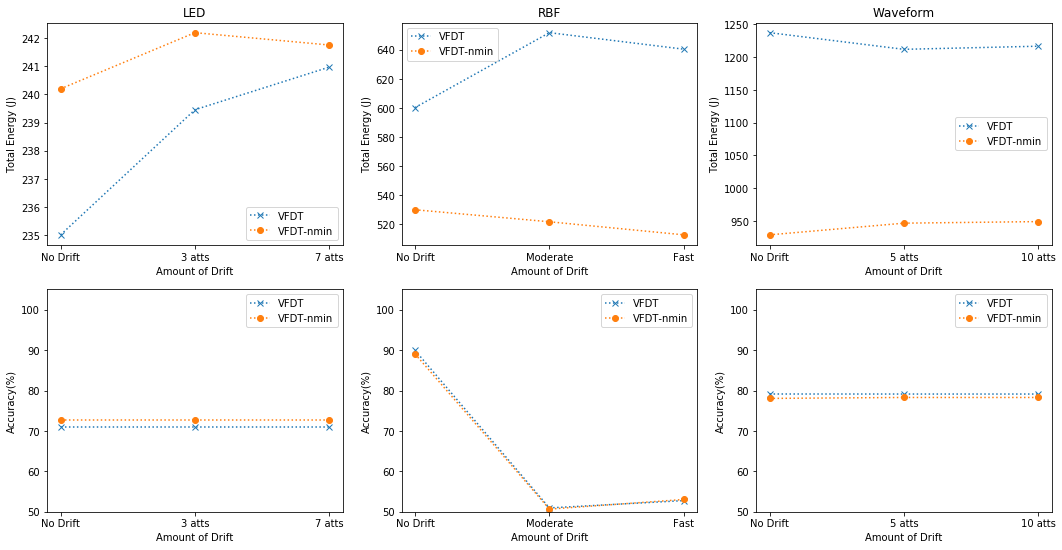

In [11]:
# Without CVFDT
fig, ((ax1, ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2, 3,  figsize=(18,9))
# fig.suptitle('Accuracy and energy consumption of drift scenarios', y=0.95)

# LED
ticks_LED = ['No Drift', '3 atts',  '7 atts']
ax1.plot(ticks_LED,LED_vfdt_eng, label='VFDT', marker='x', linestyle=":")
ax1.plot(ticks_LED,LED_vfdt_nmin_eng, label='VFDT-nmin', marker='o', linestyle=":")
# ax1.plot(ticks_LED,LED_cvfdt_eng, label='CVFDT', marker='v', linestyle=":")
ax1.legend(loc='best')
ax1.set_xlabel("Amount of Drift")
ax1.set_ylabel("Total Energy (J)")
ax1.set_title("LED")

ax4.plot(ticks_LED,LED_vfdt_acc, label='VFDT', marker='x', linestyle=":")
ax4.plot(ticks_LED,LED_vfdt_nmin_acc, label='VFDT-nmin', marker='o', linestyle=":")
# ax4.plot(ticks_LED,LED_cvfdt_acc, label='CVFDT', marker='v', linestyle=":")
ax4.legend(loc='best')
ax4.set_xlabel("Amount of Drift")
ax4.set_ylabel("Accuracy(%)")
ax4.set_ylim(50,105)


# RBF
ticks_RBF = ['No Drift', 'Moderate', 'Fast']
ax2.plot(ticks_RBF,RBF_vfdt_eng, label='VFDT', marker='x', linestyle=":")
ax2.plot(ticks_RBF,RBF_vfdt_nmin_eng, label='VFDT-nmin', marker='o', linestyle=":")
ax2.legend(loc='best')
ax2.set_xlabel("Amount of Drift")
ax2.set_ylabel("Total Energy (J)")
ax2.set_title("RBF")


ax5.plot(ticks_RBF,RBF_vfdt_acc, label='VFDT', marker='x', linestyle=":")
ax5.plot(ticks_RBF,RBF_vfdt_nmin_acc, label='VFDT-nmin', marker='o', linestyle=":")
ax5.legend(loc='best')
ax5.set_xlabel("Amount of Drift")
ax5.set_ylabel("Accuracy(%)")
ax5.set_ylim(50,105)

# waveform
ticks_wave = ['No Drift', '5 atts', '10 atts']

ax3.plot(ticks_wave,waveform_vfdt_eng, label='VFDT', marker='x', linestyle=":")
ax3.plot(ticks_wave,waveform_vfdt_nmin_eng, label='VFDT-nmin', marker='o', linestyle=":")
ax3.legend(loc='best')
ax3.set_xlabel("Amount of Drift")
ax3.set_ylabel("Total Energy (J)")
ax3.set_title("Waveform")


ax6.plot(ticks_wave,waveform_vfdt_acc, label='VFDT', marker='x', linestyle=":")
ax6.plot(ticks_wave,waveform_vfdt_nmin_acc, label='VFDT-nmin', marker='o', linestyle=":")
ax6.legend(loc='best')
ax6.set_xlabel("Amount of Drift")
ax6.set_ylabel("Accuracy(%)")
ax6.set_ylim(50,105)

fig.savefig('figures/drift_vfdts.pdf', bbox_inches='tight')
